# Amazon股票收盘价预测

## 准备工作 

本次项目使用Linear Regression模型对亚马逊股票的Adj. Close指标进行模拟预测，并对预测结果进行可视化展示。

In [1]:
#导入库文件
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#设置图表格式
plt.style.use('ggplot')
#需要导入quandl库下载数据
import quandl,math

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


quandl库是一个开放的大数据资源，已经集成了7百万个数据集，可以查到很多公开的金融和社会统计数据。我们所需的亚马逊股票数据就来自这里。

In [2]:
#下载Amazon股票历史数据，保存为dataframe数据表
AMZN_Data=quandl.get("WIKI/AMZN")
#查看数据
AMZN_Data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


不同特征所表示内容如下：

| 字段   | 表示内容    |
|:---------- |:------   |
|Date       |日期|
|Open       |开盘价  |
|High       |最高价  |
|Low       |最低价   |
|Close      |收盘价|
|Volume     |成交量   |
|Ex-Dividend  |除息价格  |
|Split Ratio  |分流比   |
|Adj. Open   |已调整收盘价 |
|Adj. High   |已调整最高价 |
|Adj. Low    |已调整最低价 |
|Adj. Close   |已调整收盘价|
|Adj. Volume  |已调整成交量 |



这里查看股票数据的缺失情况:

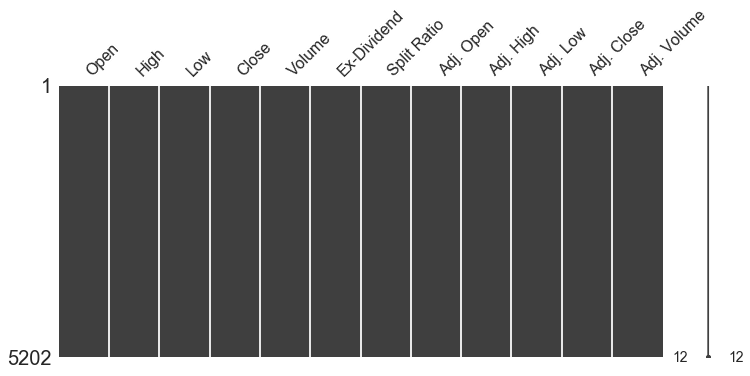

In [3]:
import missingno as msno
msno.matrix(AMZN_Data,figsize=(12,5))

可以看到下载的股票数据相当完整，接下来对Adj. Close字段的历史数据进行可视化

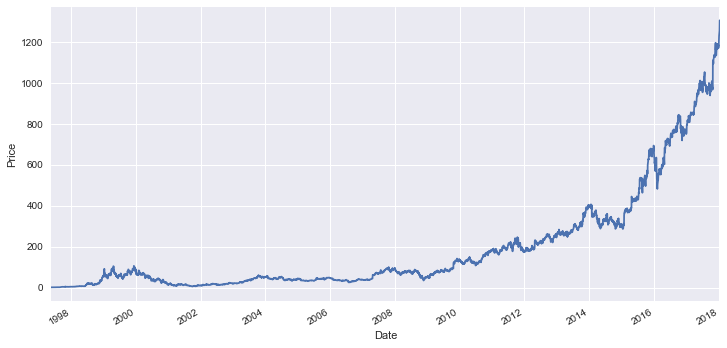

In [4]:
AMZN_Data['Adj. Close'].plot(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

图中可以清晰的看到，在2010年之前波动比较平缓，而在之后随着互联网时代的快速增长，亚马逊股票收盘价也在几乎呈线性的飞速增长。

## 划分训练集、测试集和预测数据

我们将1998年到2018年的Amazon股票数据划分为三部分，首先，取其中的1%模拟新进数据，使用模型对这1%的数据进行预测，获得Adj. Close的预测值。剩下的99%历史数据我们按常规方法划分为训练集和测试集，训练集用于对线性模型进行拟合训练，测试集数据则用来评估模型表现。

首先第一步划分用于预测的数据，计算Amazon股票历史数据1%的数值，然后从后向前提取出这1%的数据，保留用于后面的预测。

In [5]:
#计算历史数据1%的数值大小
forecast=int(math.ceil(0.01*len(AMZN_Data)))
#提取历史数据的后1%作为预测数据
forecast_data=AMZN_Data[-forecast:]
#预测数据表维度,print
forecast_data.shape

(53, 12)

这里有53个预测数据，接下来需要从前向后提取Amazon股票历史数据中剩余的99%，将这部分数据划分为训练集和测试集。

In [6]:
#提取剩余数据作为训练和测试模型表现
AMZN_Data=AMZN_Data[:-forecast]
#剩余数据的维度,print
AMZN_Data.shape

(5149, 12)

可以看到有5149个剩余数据。将Amazon股票数据除Adj. Close以外的属性设置为特征X，将Adj. Close属性设置为预测目标值y。

In [7]:
#将除Adj. Close以外的值作为特征X
X=AMZN_Data.drop(['Adj. Close'], 1)
#将Adj. Close字段作为目标值
y=AMZN_Data['Adj. Close']

继续划分训练集和测试集数据，其中训练集数据占比80%，测试集数据占比为20%。

In [8]:
#划分训练集和测试集，测试集占比20%
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

## 建立模型并评估

数据集划分完毕，接下来到了重头戏时间，使用训练集数据对模型进行训练，并使用测试集对模型进行评估，获得准确率得分。

In [9]:
#训练模型
clf=LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

这里得到了一个线性回归模型，将测试集导入查看魔性的准确率情况

In [10]:
#使用测试集数据查看模型准确率得分
test_score = clf.score(X_test,y_test)
#print
test_score

0.99999546699185726

可以看到准确率相当高，说明模型的预测结果还是蛮准确的嘛，模型建立完毕，接下里需要对1%的预测数据进行预测结果

## 预测结果并可视化

In [11]:
#设置预测数据的特征forecast_X
forecast_X=forecast_data.drop(['Adj. Close'], 1)
#通过predict使用模型对结果进行预测
forecast_result=clf.predict(forecast_X)

将预测结果生成一个DataFrame，便于后续可视化

In [12]:
result = pd.DataFrame({'Forecast':forecast_result.astype(np.int32)},index=forecast_data.index)
#print,查看预测后的数据表
result.head(10)

,Forecast
Date,
2017-11-01,1103
2017-11-02,1094
2017-11-03,1110
2017-11-06,1120
2017-11-07,1123
2017-11-09,1128
2017-11-10,1125
2017-11-13,1130
2017-11-14,1136


使用图表对预测集的原始收盘价格Adj. Close和预测收盘价位Forecast进行可视化，观察原始数据和预测结果的走势差异

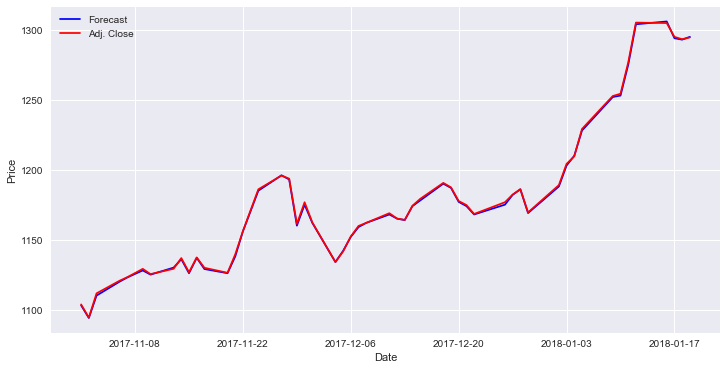

In [13]:
#设置图片大小
fig = plt.figure(figsize = (12,6))
#绘制预测值forecast走势
plt.plot(result.index,result['Forecast'],color='b')
#绘制原始值Adj. Close走势
plt.plot(forecast_data.index,forecast_data['Adj. Close'],color='r')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

可以看到预测结果和原始数据走势基本保持一致，接下来继续对Adj. Close的历史数据和预测数据进行拼接及可视化。下图中，蓝色部分为99%的历史数据中Adj. Close的变化趋势，绿色部分为1%的Adj. Close预测数据变化趋势。

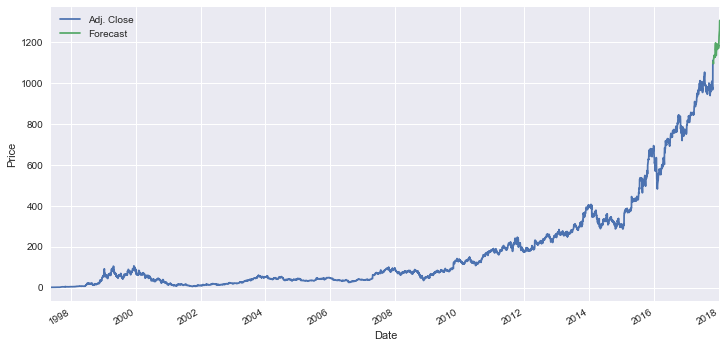

In [14]:
#对真实值和预测值可视化
fig = plt.figure(figsize = (12,6))
#绘制99%的历史数据走势
AMZN_Data['Adj. Close'].plot()
#绘制1%的Adj. Close预测数据变化趋势
result['Forecast'].plot()
#设置图例位置
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()